In [1]:
import datajoint as dj

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp

In [3]:
from pipeline import psth as psth
from pipeline import ephys

Connecting daveliu@mesoscale-activity.datajoint.io:3306


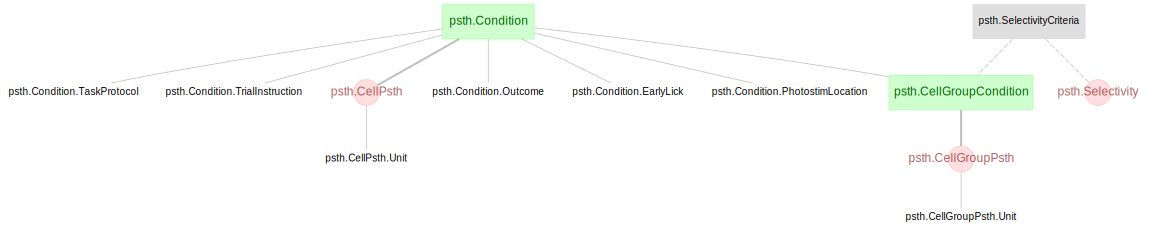

In [4]:
dj.ERD(psth)

In [7]:
psth.Condition().populate()

In [10]:
psth.Condition()

condition_id,condition_desc
0,audio delay contra hit
1,audio delay ipsi hit
2,audio delay contra error
3,audio delay ipsi error


In [5]:
psth_0 = psth.CellPsth() & {'condition_id': 0}

In [16]:
psth.CellPsth().populate()

In [6]:
psth.CellPsth.Unit & psth_0

condition_id,subject_id institution 6 digit animal ID,session session number,electrode_group Electrode_group is like the probe,unit,cell_psth
0,412330,64,1,6,=BLOB=
0,412330,64,1,7,=BLOB=
0,412330,64,1,11,=BLOB=
0,412330,64,1,17,=BLOB=
0,412330,64,1,33,=BLOB=
0,412330,64,1,34,=BLOB=
0,412330,64,1,37,=BLOB=


In [8]:
(psth.CellPsth.Unit & psth_0) & {'condition_id': 0, 'subject_id': 90211, 'session': 1, 'unit': 4}

condition_id,subject_id institution 6 digit animal ID,session session number,electrode_group Electrode_group is like the probe,unit,cell_psth
0,90211,1,1,4,=BLOB=


In [9]:
psth_0_data = ((psth.CellPsth.Unit & psth_0) & {'condition_id': 0, 'subject_id': 90211, 'session': 1, 'unit': 4}).fetch1()

In [10]:
psth_0_data['cell_psth']

array([ 2.90697674,  4.06976744,  4.76744186,  3.8372093 ,  3.02325581,
        3.48837209,  3.48837209,  3.02325581,  2.44186047,  4.30232558,
        4.30232558,  4.41860465,  3.25581395,  5.34883721,  5.23255814,
        6.39534884,  8.8372093 , 15.93023256, 16.1627907 , 15.58139535,
       17.90697674, 10.81395349,  7.6744186 ,  4.30232558,  5.34883721,
        7.44186047,  6.62790698,  3.8372093 ,  2.79069767,  2.90697674,
        2.44186047,  2.6744186 ,  5.        ,  8.13953488,  4.88372093,
        2.20930233,  3.48837209,  3.13953488,  4.06976744,  7.79069767,
        6.86046512,  3.37209302,  1.51162791,  4.76744186,  7.55813953,
        7.20930233,  8.60465116,  4.41860465,  3.25581395,  4.30232558,
        5.23255814,  4.41860465,  6.86046512,  8.37209302,  5.69767442,
        5.81395349,  9.18604651, 14.65116279, 13.95348837, 17.20930233,
       17.55813953, 20.        , 16.1627907 , 14.53488372, 11.39534884,
       15.        , 18.60465116, 22.55813953, 22.55813953, 23.37

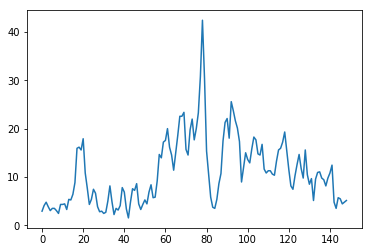

In [11]:
plt.plot(psth_0_data['cell_psth'])

In [20]:
psth.Selectivity() & {'unit': 4}

subject_id institution 6 digit animal ID,session session number,electrode_group Electrode_group is like the probe,unit,sample_selectivity,delay_selectivity,go_selectivity
90211,1,1,4,0,1,0


In [6]:
psth.Condition().populate()

In [7]:
psth.Condition()

condition_id,condition_desc
0,audio delay contra hit
1,audio delay ipsi hit
2,audio delay contra error
3,audio delay ipsi error


In [12]:
ephys.Unit() & {'unit_quality': 'good'}

subject_id institution 6 digit animal ID,session session number,electrode_group Electrode_group is like the probe,unit,unit_uid unique across sessions/animals,unit_quality,unit_site site on the electrode for which the unit has the largest amplitude,unit_posx x position of the unit on the probe,unit_posy y position of the unit on the probe,spike_times (s),waveform average spike waveform
90211,1,1,0,0,good,6,42.4544792175293,33.699256896972656,=BLOB=,=BLOB=
90211,1,1,4,4,good,5,14.338550567626953,38.978546142578125,=BLOB=,=BLOB=
90211,1,1,9,9,good,10,44.27643966674805,79.20182800292969,=BLOB=,=BLOB=
90211,1,1,10,10,good,10,45.542633056640625,80.29844665527344,=BLOB=,=BLOB=
90211,1,1,14,14,good,12,31.08588409423828,98.89152526855469,=BLOB=,=BLOB=
90211,1,1,17,17,good,18,45.05342483520508,159.88873291015625,=BLOB=,=BLOB=
90211,1,1,20,20,good,22,46.288734436035156,199.1356201171875,=BLOB=,=BLOB=


In [18]:
trials = {i: psth.Condition().trials(i) for i in range(4)}

In [43]:
psth.Condition().fetch()

array([(0, 'audio delay contra hit'), (1, 'audio delay ipsi hit'),
       (2, 'audio delay contra error'), (3, 'audio delay ipsi error')],
      dtype=[('condition_id', '<i8'), ('condition_desc', 'O')])

In [47]:
k = {'subject_id': 90211, 'session': 1, 'electrode_group': 1, 'unit': 4}
q = (psth.CellPsth.Unit() * psth.Condition() & k)
print(q)
data = q.fetch()

*condition_id  *subject_id    *session    *electrode_gro *unit    cell_psth  condition_desc
+------------+ +------------+ +---------+ +------------+ +------+ +--------+ +------------+
0              90211          1           1              4        =BLOB=     audio delay co
1              90211          1           1              4        =BLOB=     audio delay ip
2              90211          1           1              4        =BLOB=     audio delay co
3              90211          1           1              4        =BLOB=     audio delay ip
 (Total: 4)



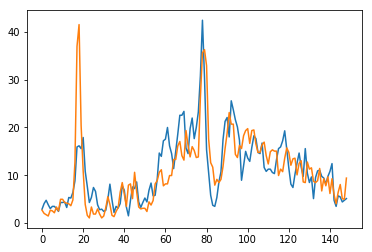

In [44]:
plt.plot(data['cell_psth'][0])
plt.plot(data['cell_psth'][1])

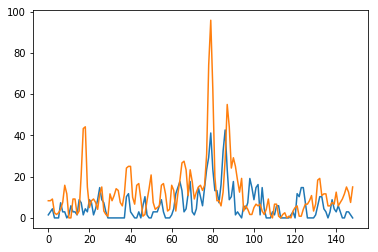

In [45]:
plt.plot(data['cell_psth'][2])
plt.plot(data['cell_psth'][3])

In [46]:
psth.Selectivity()

subject_id institution 6 digit animal ID,session session number,electrode_group Electrode_group is like the probe,unit,sample_selectivity,delay_selectivity,go_selectivity
90211,1,1,0,0,0,0
90211,1,1,1,0,0,0
90211,1,1,5,0,0,0
90211,1,1,11,0,0,0
90211,1,1,14,0,0,0
90211,1,1,15,0,0,0
90211,1,1,18,0,0,0


In [48]:
psth.Selectivity() & k

subject_id institution 6 digit animal ID,session session number,electrode_group Electrode_group is like the probe,unit,sample_selectivity,delay_selectivity,go_selectivity
90211,1,1,4,0,1,0
